<a href="https://colab.research.google.com/github/shoopy7/M4-1-managing-proj/blob/main/Exploring_IRS_990_form_Data_for_a_Nonprofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective:  Exploring Trends for a Nonprofit

Created in collaboration with OpenAI ChatGPT




# Data

## data collection source

Data collected March 2025 from:
  * https://projects.propublica.org/nonprofits/organizations/135613797
  * ProPublica website --> AHA (select years)

# libraries

In [ ]:
#Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# use xml data from propublica website
import xml.etree.ElementTree as ET

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Load and copy data set and mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# propublica data for AHA

In [ ]:
# Define file paths
xml_files = [
    {{{{{ insert pathways to your files }}}}}
]

In [1]:
# # Loop through each file and inspect its structure
# for file in xml_files:
#     print(f"\n🔍 Inspecting: {file}\n")
#     tree = ET.parse(file)
#     root = tree.getroot()

#     # Print first 15 elements to understand structure
#     count = 0
#     for elem in root.iter():
#         print(elem.tag, ":", elem.text)
#         count += 1
#         if count >= 15:  # Stop after 30 (or change 15) elements per file
#             break


In [ ]:
# Keywords to filter relevant tags
keywords = ["Revenue", "Expenses", "Contributions", "Donations", "Gifts",
            "Fundraising", "Year", "EIN"]

# Set to store relevant tags
relevant_tags = set()

# Loop through each file and find matching tags
for file in xml_files:
    tree = ET.parse(file)
    root = tree.getroot()
    for elem in root.iter():
        tag = elem.tag
        if any(keyword in tag for keyword in keywords):  # Check if tag matches keywords
            relevant_tags.add(tag)

# Print sorted relevant tags
print("\n🔍 Relevant Tags for Analysis:\n")
for tag in sorted(relevant_tags):
    print(tag)


🔍 Relevant Tags for Analysis:

{http://www.irs.gov/efile}AgrmtProfFundraisingActyInd
{http://www.irs.gov/efile}AllOtherContributionsAmt
{http://www.irs.gov/efile}AllOtherExpensesGrp
{http://www.irs.gov/efile}BeginningYearBalanceAmt
{http://www.irs.gov/efile}CYContributionsGrantsAmt
{http://www.irs.gov/efile}CYOtherExpensesAmt
{http://www.irs.gov/efile}CYOtherRevenueAmt
{http://www.irs.gov/efile}CYProgramServiceRevenueAmt
{http://www.irs.gov/efile}CYRevenuesLessExpensesAmt
{http://www.irs.gov/efile}CYTotalExpensesAmt
{http://www.irs.gov/efile}CYTotalFundraisingExpenseAmt
{http://www.irs.gov/efile}CYTotalRevenueAmt
{http://www.irs.gov/efile}CharitableContributionsTotAmt
{http://www.irs.gov/efile}CompBasedOnRevenueOfFlngOrgInd
{http://www.irs.gov/efile}ContriRptFundraisingEventAmt
{http://www.irs.gov/efile}ContributionsAmt
{http://www.irs.gov/efile}CurrentTaxYearAmt
{http://www.irs.gov/efile}CurrentTaxYearMinus1YearAmt
{http://www.irs.gov/efile}CurrentTaxYearMinus2YearsAmt
{http://www.ir

In [ ]:
# # Define the XML files (already provided)
# xml_files = [
#     "/content/drive/MyDrive/Colab Notebooks/donor fundraising notebook/propublica xml data files/202410799349301221_public.xml",
#     "/content/drive/MyDrive/Colab Notebooks/donor fundraising notebook/propublica xml data files/202300729349301220_public.xml",
#     "/content/drive/MyDrive/Colab Notebooks/donor fundraising notebook/propublica xml data files/202220749349300632_public.xml",
#     "/content/drive/MyDrive/Colab Notebooks/donor fundraising notebook/propublica xml data files/202100689349300430_public.txt"
# ]

# Initialize an empty list to store the data
data_list = []

# Define the tags to extract
relevant_tags = {
    'EIN': '{http://www.irs.gov/efile}EIN',
    'TotalRevenue': '{http://www.irs.gov/efile}CYTotalRevenueAmt',
    'TotalExpenses': '{http://www.irs.gov/efile}CYTotalExpensesAmt',
    'FundraisingExpenses': '{http://www.irs.gov/efile}FundraisingDirectExpensesAmt',
    'Contributions': '{http://www.irs.gov/efile}TotalContributionsAmt',
    'FundraisingIncome': '{http://www.irs.gov/efile}FundraisingGrossIncomeAmt',
    'FederatedCampaignsAmt':'{http://www.irs.gov/efile}FederatedCampaignsAmt',
    'Grants':'{http://www.irs.gov/efile}GovernmentGrantsAmt',
    #'Inkind donations':'{http://www.irs.gov/efile}NonCashContributionsAmt'   # none
}

years = []

# Loop through each XML file
for file in xml_files:
    tree = ET.parse(file)
    root = tree.getroot()

    # Dictionary to store extracted values for the current XML file
    record = {}

    # Loop through the relevant tags and extract the values
    for key, tag in relevant_tags.items():
        element = root.find(".//" + tag)  # Find the tag using XPath
        if element is not None:
            record[key] = element.text  # Get the text inside the tag
        else:
            record[key] = None  # If the tag is not found, assign None

    # Add the record to the data list
    data_list.append(record)

# Create a DataFrame from the list of records
df990 = pd.DataFrame(data_list)        #CHANGE DATAFRAME NAME!!!

# Preview the first few rows of the DataFrame
df990.head()                             #CHANGE DATAFRAME NAME!!!


,EIN,TotalRevenue,TotalExpenses,FundraisingExpenses,Contributions,FundraisingIncome,FederatedCampaignsAmt,Grants
0,135613797,925828648,862517013,36098573,647447749,18233770,1369549,20725759
1,135613797,855744080,751717150,30360739,608045401,19101446,1458994,16267076
2,135613797,803987961,693590695,7687246,542287875,12554316,1605323,7067204
3,135613797,700362587,740233913,27147730,511100070,16384493,2205749,4284594


In [ ]:
# Loop through each XML file to extract the year from TaxPeriodEndDt
years = []
for file in xml_files:
    tree = ET.parse(file)
    root = tree.getroot()
    # Find the TaxPeriodEndDt tag (you might need to adjust the tag based on your data structure)
    for elem in root.iter():
        if 'TaxPeriodEndDt' in elem.tag:
            # Extract the year from the date string (assuming format is YYYY-MM-DD)
            year = elem.text[:4]  # Grab the first 4 characters of the date string
            years.append(year)

# Now you can add this to your dataframe (assuming df is your dataframe)
df990['Year'] = years

# Reorder the columns to make 'Year' the first column
df990 = df990[['Year'] + [col for col in df990.columns if col != 'Year']]

# Sort by Year
df990 = df990.sort_values(by='Year', ascending=True)

# Check the updated dataframe
df990.head()


,Year,EIN,TotalRevenue,TotalExpenses,FundraisingExpenses,Contributions,FundraisingIncome,FederatedCampaignsAmt,Grants
3,2020,135613797,700362587,740233913,27147730,511100070,16384493,2205749,4284594
2,2021,135613797,803987961,693590695,7687246,542287875,12554316,1605323,7067204
1,2022,135613797,855744080,751717150,30360739,608045401,19101446,1458994,16267076
0,2023,135613797,925828648,862517013,36098573,647447749,18233770,1369549,20725759


### Cost per Dollar Raised

In [ ]:
# Make sure the columns for Fundraising Expenses and Fundraising Income are numeric
df990['FundraisingExpenses'] = pd.to_numeric(df990['FundraisingExpenses'], errors='coerce')
df990['FundraisingIncome'] = pd.to_numeric(df990['FundraisingIncome'], errors='coerce')

# Calculate cost per dollar raised
df990['CostPerDollarRaised'] = df990['FundraisingExpenses'] / df990['FundraisingIncome']

# Preview the data
# df990[['FundraisingExpenses', 'FundraisingIncome', 'CostPerDollarRaised']].head()
df990.head()

,Year,EIN,TotalRevenue,TotalExpenses,FundraisingExpenses,Contributions,FundraisingIncome,FederatedCampaignsAmt,Grants,CostPerDollarRaised
3,2020,135613797,700362587,740233913,27147730,511100070,16384493,2205749,4284594,1.656916
2,2021,135613797,803987961,693590695,7687246,542287875,12554316,1605323,7067204,0.612319
1,2022,135613797,855744080,751717150,30360739,608045401,19101446,1458994,16267076,1.589447
0,2023,135613797,925828648,862517013,36098573,647447749,18233770,1369549,20725759,1.979765


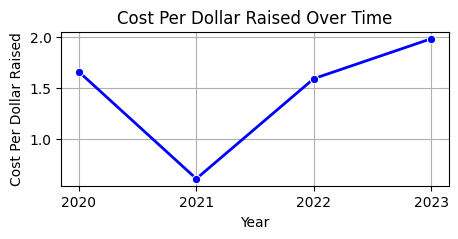

In [ ]:
# code for a visual
# Sort the DataFrame by Year (ascending for chronological order)
df990 = df990.sort_values(by='Year', ascending=True)

# Plot the Cost Per Dollar Raised over the years
plt.figure(figsize=(5, 2))
sns.lineplot(x=df990['Year'], y=df990['CostPerDollarRaised'], marker='o', linewidth=2, color='blue')

# Formatting the plot
plt.xlabel('Year')
plt.ylabel('Cost Per Dollar Raised')
plt.title('Cost Per Dollar Raised Over Time')
plt.xticks(df990['Year'])  # Ensure all years are labeled
plt.grid(True)

# Show the plot
plt.show()


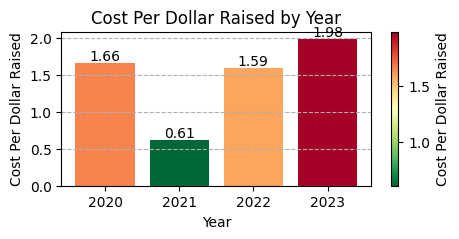

In [ ]:
# Normalize the 'CostPerDollarRaised' values for color mapping
norm = plt.Normalize(df990['CostPerDollarRaised'].min(), df990['CostPerDollarRaised'].max())

# Define a color map (red for high, green for low)
colors = plt.cm.RdYlGn_r(norm(df990['CostPerDollarRaised']))  # Reverse 'RdYlGn' for green-low, red-high

# Create the plot
fig, ax = plt.subplots(figsize=(5, 2))

# Create the bar plot
bars = ax.bar(df990['Year'], df990['CostPerDollarRaised'], color=colors)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Add a colorbar to show the gradient
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=norm)
sm.set_array([])  # To avoid a warning

# Explicitly pass the axis to the colorbar
fig.colorbar(sm, ax=ax, label='Cost Per Dollar Raised')

# Formatting
ax.set_xlabel('Year')
ax.set_ylabel('Cost Per Dollar Raised')
ax.set_title('Cost Per Dollar Raised by Year')
ax.set_xticks(df990['Year'])  # Ensure years are correctly placed on the x-axis
ax.grid(axis='y', linestyle='--')

# Show the plot
plt.show()



 #### cost per dollar raised interpretation

* value of 1: This means the organization spends exactly 1 to raise 1 in
fundraising income.

    * A value greater than 1: This means the organization spends more than $1 to raise $1 in income. For example, a value of 1.98 means the organization is spending about 1.98 to raise $1 in fundraising income. This is typically not ideal, as it suggests inefficiency in fundraising efforts.
    
    * A value less than 1: This would suggest the organization is generating more income from fundraising than it is spending on the activity (although, realistically, a value less than 1 is rare and might indicate underreporting or miscategorization).

    
* Interpreting the data:
    * 2023: The organization spent 1.98 to raise 1 in fundraising income, which indicates a fairly inefficient fundraising operation.
    * 2022: The spending was $1.59 for every dollar raised, which is still high, but slightly better than in 2023.
    * 2021: The spending decreased significantly to $0.61 per dollar raised, suggesting the organization improved efficiency in fundraising.
    * 2020: The cost was $1.66, indicating another inefficient year for fundraising.

* What this suggests:

If the Cost per Dollar Raised is consistently over 1 (as it is in most of your data), it might indicate that the organization’s fundraising is relatively costly compared to the amount it is raising. This could be a red flag, suggesting the need for better strategy or cost reduction in fundraising activities.


A drop in the cost (like in 2021) suggests improvements or changes in strategy that led to more efficient fundraising.


##### A good benchmark:
Nonprofit organizations typically aim for a Cost per Dollar Raised ratio of 0.20 to 0.40 (spending 20-40 cents to raise $1). If it's much higher, the organization might need to reconsider its fundraising practices.



Uses the RdYlGn_r colormap (reversed Red-Yellow-Green) so that:

Green = lower costs per dollar raised (good)

Red = higher costs per dollar raised (bad)

### Fundraising Efficiency Over Time

examine Fundraising Expenses as a Percentage of Total Revenue


In [ ]:
# Make sure the columns are numeric
df990['FundraisingExpenses'] = pd.to_numeric(df990['FundraisingExpenses'], errors='coerce')
df990['TotalRevenue'] = pd.to_numeric(df990['TotalRevenue'], errors='coerce')

# Calculate
df990['FundraisingExpensesPercentTotalRevenue'] = (df990['FundraisingExpenses'] / df990['TotalRevenue']) * 100

# Preview the data
df990.head()

,Year,EIN,TotalRevenue,TotalExpenses,FundraisingExpenses,Contributions,FundraisingIncome,FederatedCampaignsAmt,Grants,CostPerDollarRaised,FundraisingExpensesPercentTotalRevenue
3,2020,135613797,700362587,740233913,27147730,511100070,16384493,2205749,4284594,1.656916,3.876239
2,2021,135613797,803987961,693590695,7687246,542287875,12554316,1605323,7067204,0.612319,0.956139
1,2022,135613797,855744080,751717150,30360739,608045401,19101446,1458994,16267076,1.589447,3.547876
0,2023,135613797,925828648,862517013,36098573,647447749,18233770,1369549,20725759,1.979765,3.899056


<ipython-input-90-e116710e7cd9>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


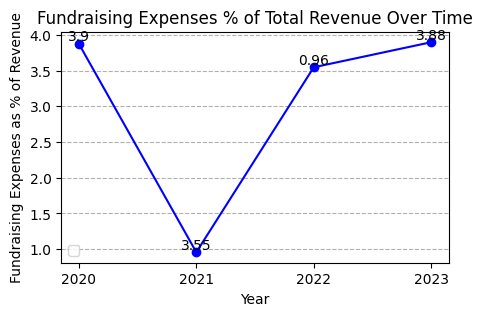

In [ ]:
# # Sort DataFrame by Year
# df990 = df990.sort_values(by='Year', ascending=True)

# Create the line chart
plt.figure(figsize=(5, 3))
plt.plot(df990['Year'], df990['FundraisingExpensesPercentTotalRevenue'], marker='o', linestyle='-', color='blue') #, label='Fundraising % of Revenue')

# Add labels for each point
for i, txt in enumerate(df990['FundraisingExpensesPercentTotalRevenue']):
    plt.text(df990['Year'][i], df990['FundraisingExpensesPercentTotalRevenue'][i], round(txt, 2), ha='center', va='bottom', fontsize=10)

# Formatting
plt.xlabel('Year')
plt.ylabel('Fundraising Expenses as % of Revenue')
plt.title('Fundraising Expenses % of Total Revenue Over Time')
plt.xticks(df990['Year'])
plt.grid(axis='y', linestyle='--')
plt.legend()

# Show the plot
plt.show()


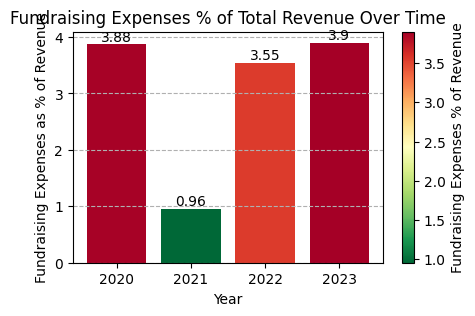

In [ ]:
# Normalize the 'FundraisingExpensesPercentTotalRevenue' values to map them to colors
norm = plt.Normalize(df990['FundraisingExpensesPercentTotalRevenue'].min(), df990['FundraisingExpensesPercentTotalRevenue'].max())

# Get the color map (Red for high, Green for low)
colors = plt.cm.RdYlGn_r(norm(df990['FundraisingExpensesPercentTotalRevenue']))  # Reverse 'RdYlGn' for green-low, red-high

# Create the plot
fig, ax = plt.subplots(figsize=(5, 3))

# Create the bar plot
bars = ax.bar(df990['Year'], df990['FundraisingExpensesPercentTotalRevenue'], color=colors)

# Add labels to each bar
for index, value in enumerate(df990['FundraisingExpensesPercentTotalRevenue']):
    ax.text(index, value, round(value, 2), ha='center', va='bottom', fontsize=10)

# Add a colorbar to show the gradient
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=norm)
sm.set_array([])  # To avoid a warning

# Explicitly pass the axis to the colorbar
fig.colorbar(sm, ax=ax, label='Fundraising Expenses % of Revenue')

# Formatting
ax.set_xlabel('Year')
ax.set_ylabel('Fundraising Expenses as % of Revenue')
ax.set_title('Fundraising Expenses % of Total Revenue Over Time')
ax.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


### Revenue vs. Expenses Trend

Compare Total Revenue and Total Expenses over the 4 years.

Are expenses growing faster than revenue? If so, that might indicate financial strain.

In [ ]:
# Make sure the columns are numeric
df990['TotalRevenue'] = pd.to_numeric(df990['TotalRevenue'], errors='coerce')
df990['TotalExpenses'] = pd.to_numeric(df990['TotalExpenses'], errors='coerce')

# Calculate
df990['Revenue_v_Expenses'] = df990['TotalRevenue'] - df990['TotalExpenses']

# Preview the data
df990.head()

,Year,EIN,TotalRevenue,TotalExpenses,FundraisingExpenses,Contributions,FundraisingIncome,FederatedCampaignsAmt,Grants,CostPerDollarRaised,FundraisingExpensesPercentTotalRevenue,Revenue_v_Expenses
3,2020,135613797,700362587,740233913,27147730,511100070,16384493,2205749,4284594,1.656916,3.876239,-39871326
2,2021,135613797,803987961,693590695,7687246,542287875,12554316,1605323,7067204,0.612319,0.956139,110397266
1,2022,135613797,855744080,751717150,30360739,608045401,19101446,1458994,16267076,1.589447,3.547876,104026930
0,2023,135613797,925828648,862517013,36098573,647447749,18233770,1369549,20725759,1.979765,3.899056,63311635


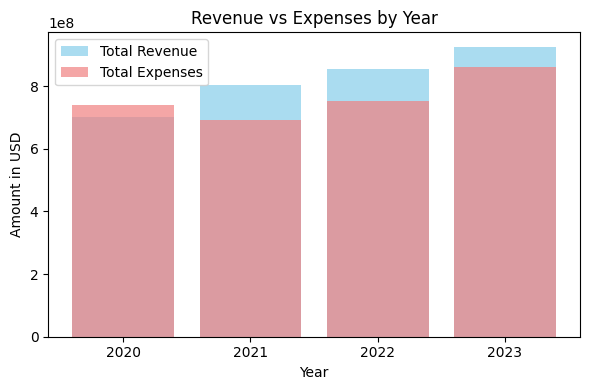

In [ ]:
# Create a bar chart for Revenue vs Expenses
plt.figure(figsize=(6, 4))

# Plot Total Revenue and Total Expenses
plt.bar(df990['Year'], df990['TotalRevenue'], label='Total Revenue', color='skyblue', alpha=0.7)
plt.bar(df990['Year'], df990['TotalExpenses'], label='Total Expenses', color='lightcoral', alpha=0.7)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Amount in USD')
plt.title('Revenue vs Expenses by Year')

# Add legend to differentiate between Revenue and Expenses
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Positive Value = The nonprofit made more than it spent (surplus).

Negative Value = The nonprofit spent more than it made (deficit).

Zero = Revenue matched expenses (break-even).

### Contribution Dependency

What percentage of revenue comes from contributions?



If contributions make up most of the revenue, the organization is highly dependent on donors, which could be a risk.

If contribution dependency is decreasing, it may suggest diversification (e.g., investments, program income).

In [ ]:
# Make sure the columns are numeric
df990['Contributions'] = pd.to_numeric(df990['Contributions'], errors='coerce')
df990['TotalRevenue'] = pd.to_numeric(df990['TotalRevenue'], errors='coerce')

# Calculate
df990['ContributionDependency'] = (df990['Contributions'] / df990['TotalRevenue']) * 100

# Preview the data
df990.head()

,Year,EIN,TotalRevenue,TotalExpenses,FundraisingExpenses,Contributions,FundraisingIncome,FederatedCampaignsAmt,Grants,CostPerDollarRaised,FundraisingExpensesPercentTotalRevenue,Revenue_v_Expenses,ContributionDependency
3,2020,135613797,700362587,740233913,27147730,511100070,16384493,2205749,4284594,1.656916,3.876239,-39871326,72.976495
2,2021,135613797,803987961,693590695,7687246,542287875,12554316,1605323,7067204,0.612319,0.956139,110397266,67.449751
1,2022,135613797,855744080,751717150,30360739,608045401,19101446,1458994,16267076,1.589447,3.547876,104026930,71.054585
0,2023,135613797,925828648,862517013,36098573,647447749,18233770,1369549,20725759,1.979765,3.899056,63311635,69.931704


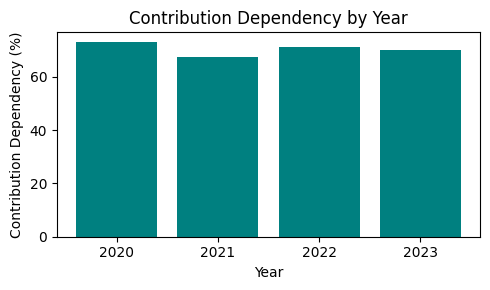

In [ ]:
# code for a visual
# Create a bar chart for Contribution Dependency
plt.figure(figsize=(5, 3))
plt.bar(df990['Year'], df990['ContributionDependency'], color='teal')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Contribution Dependency (%)')
plt.title('Contribution Dependency by Year')

# Show the plot
plt.tight_layout()
plt.show()


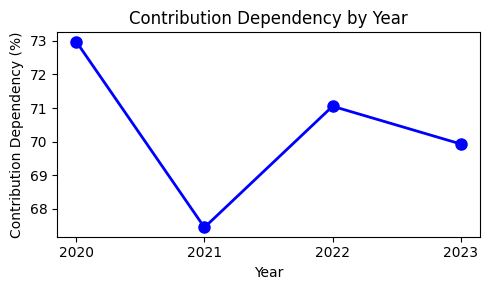

In [ ]:
# Create a line plot for Contribution Dependency
plt.figure(figsize=(5, 3))
plt.plot(df990['Year'], df990['ContributionDependency'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Contribution Dependency (%)')
plt.title('Contribution Dependency by Year')

# Show the plot
plt.tight_layout()
plt.show()


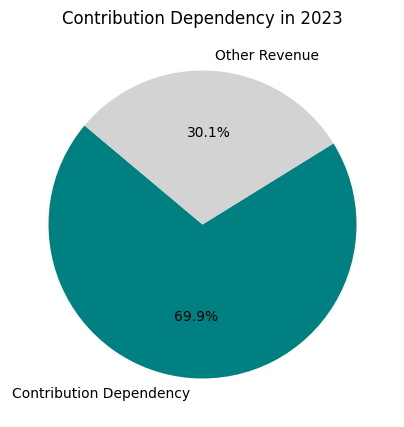

In [ ]:
# Create a Pie chart for Contribution Dependency in the latest year
labels = ['Contribution Dependency', 'Other Revenue']
sizes = [df990['ContributionDependency'][0], 100 - df990['ContributionDependency'][0]]  # Example for the latest year (2023)

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['teal', 'lightgrey'], startangle=140)

# Title for Pie chart
plt.title('Contribution Dependency in 2023')

# Show the plot
plt.show()


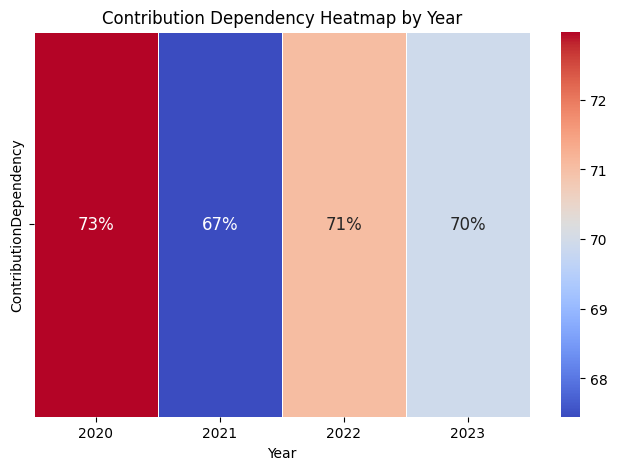

In [ ]:
# Creating a DataFrame just with 'Year' and 'ContributionDependency'
heatmap_data = df990[['Year', 'ContributionDependency']].set_index('Year')

# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data.T, annot=True, cmap='coolwarm', cbar=True,
            linewidths=0.5, annot_kws={"size": 12})

# Add '%' symbol to the annotations
for text in plt.gca().texts:
    text.set_text(f"{text.get_text()}%")

# Title for Heatmap
plt.title('Contribution Dependency Heatmap by Year')

# Show the plot
plt.show()


Notes:

### Fundraising Income vs. Contributions

If Fundraising Income is much lower than Contributions, it suggests most donations are not tied to direct fundraising events but other sources (e.g., grants, corporate donations).



If Fundraising Income is much lower than Contributions, it indeed suggests that most of the donations may not be coming from direct fundraising efforts (such as events or campaigns) but rather from other sources.



Difference: Shows the absolute gap between Fundraising Income and Contributions.

Ratio: Shows the relative size of Fundraising Income in relation to Contributions.

In [ ]:
# Make sure the columns are numeric
df990['FundraisingIncome'] = pd.to_numeric(df990['FundraisingIncome'], errors='coerce')
df990['Contributions'] = pd.to_numeric(df990['Contributions'], errors='coerce')

# Difference between Fundraising Income and Contributions
df990['FundraisingInc_vs_Contributions_Difference'] = df990['Contributions'] - df990['FundraisingIncome']

# (Ratio) Percentage of Fundraising Income from Contributions
df990['FundraisingInc_vs_Contributions_%age'] = (df990['FundraisingIncome'] / df990['Contributions']) * 100


# Preview the data
df990.head()

,Year,EIN,TotalRevenue,TotalExpenses,FundraisingExpenses,Contributions,FundraisingIncome,FederatedCampaignsAmt,Grants,CostPerDollarRaised,FundraisingExpensesPercentTotalRevenue,Revenue_v_Expenses,ContributionDependency,FundraisingInc_v_Contributions,FundraisingInc_Contributions_Ratio,FundraisingInc_vs_Contributions_Difference,FundraisingInc_vs_Contributions_Ratio,FundraisingInc_vs_Contributions_%age
3,2020,135613797,700362587,740233913,27147730,511100070,16384493,2205749,4284594,1.656916,3.876239,-39871326,72.976495,494715577,0.032057,494715577,0.032057,3.205731
2,2021,135613797,803987961,693590695,7687246,542287875,12554316,1605323,7067204,0.612319,0.956139,110397266,67.449751,529733559,0.023151,529733559,0.023151,2.315065
1,2022,135613797,855744080,751717150,30360739,608045401,19101446,1458994,16267076,1.589447,3.547876,104026930,71.054585,588943955,0.031415,588943955,0.031415,3.141451
0,2023,135613797,925828648,862517013,36098573,647447749,18233770,1369549,20725759,1.979765,3.899056,63311635,69.931704,629213979,0.028163,629213979,0.028163,2.816254


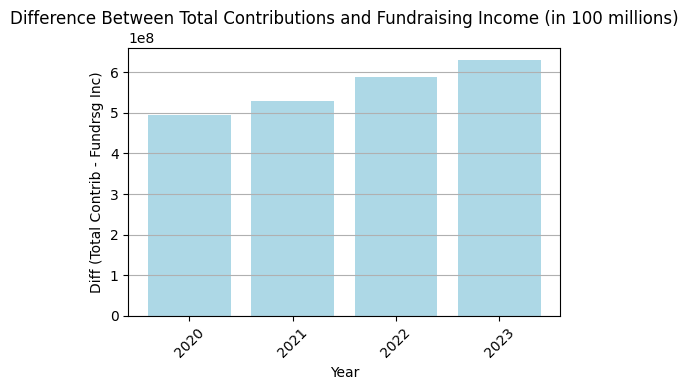

In [ ]:
# Plotting the difference between Contributions and Fundraising Income
plt.figure(figsize=(5, 4))
plt.bar(df990['Year'], df990['FundraisingInc_vs_Contributions_Difference'], color='lightblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Diff (Total Contrib - Fundrsg Inc)')
plt.title('Difference Between Total Contributions and Fundraising Income (in 100 millions)')

# Formatting
plt.xticks(df990['Year'], rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


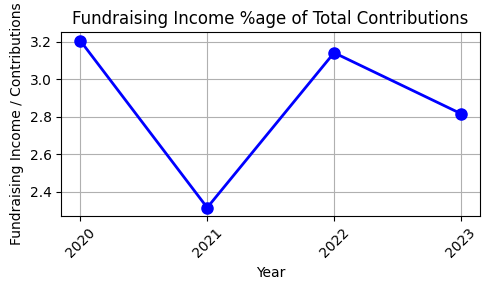

In [ ]:
# Plotting the ratio of Fundraising Income to Contributions
plt.figure(figsize=(5, 3))
plt.plot(df990['Year'], df990['FundraisingInc_vs_Contributions_%age'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Fundraising Income / Contributions')
plt.title('Fundraising Income %age of Total Contributions')

# Formatting
plt.grid(True)
plt.xticks(df990['Year'], rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Notes:

High Positive Difference:
* If the difference is large (i.e., contributions are much greater than fundraising income), this would suggest that a significant portion of revenue is coming from non-fundraising activities, like grants, corporate donations, or donor-based contributions.

Low or Negative Difference:
* A negative difference indicates that the organization might have a fundraising shortfall, which could prompt an analysis into why fundraising income is lagging behind contributions.

By applying this analysis, you'll be able to better understand how fundraising income compares to contributions and possibly identify areas for potential improvements.


### Yearly Growth Rates


Calculate the year-over-year percentage change in Revenue, Expenses, Contributions, and Fundraising Income to identify growth trends.

A declining revenue trend may signal financial trouble.


If fundraising income fluctuates a lot, it might suggest inconsistency in donor engagement.

In [ ]:
# Ensure numeric columns
df990[['TotalRevenue', 'TotalExpenses', 'Contributions', 'FundraisingIncome']] = df990[
    ['TotalRevenue', 'TotalExpenses', 'Contributions', 'FundraisingIncome']
].apply(pd.to_numeric, errors='coerce')

# Sort by Year (descending order to align calculations)
df990 = df990.sort_values(by='Year', ascending=True)

# Calculate Year-over-Year Growth Rate for key metrics
df990['Revenue_Growth'] = df990['TotalRevenue'].pct_change() * 100
df990['Expenses_Growth'] = df990['TotalExpenses'].pct_change() * 100
df990['Contributions_Growth'] = df990['Contributions'].pct_change() * 100
df990['FundraisingIncome_Growth'] = df990['FundraisingIncome'].pct_change() * 100

# Display the updated DataFrame
df990.head()


,Year,EIN,TotalRevenue,TotalExpenses,FundraisingExpenses,Contributions,FundraisingIncome,FederatedCampaignsAmt,Grants,CostPerDollarRaised,...,ContributionDependency,FundraisingInc_v_Contributions,FundraisingInc_Contributions_Ratio,FundraisingInc_vs_Contributions_Difference,FundraisingInc_vs_Contributions_Ratio,FundraisingInc_vs_Contributions_%age,Revenue_Growth,Expenses_Growth,Contributions_Growth,FundraisingIncome_Growth
3,2020,135613797,700362587,740233913,27147730,511100070,16384493,2205749,4284594,1.656916,...,72.976495,494715577,0.032057,494715577,0.032057,3.205731,NaN,NaN,NaN,NaN
2,2021,135613797,803987961,693590695,7687246,542287875,12554316,1605323,7067204,0.612319,...,67.449751,529733559,0.023151,529733559,0.023151,2.315065,14.795961,-6.301146,6.102094,-23.376842
1,2022,135613797,855744080,751717150,30360739,608045401,19101446,1458994,16267076,1.589447,...,71.054585,588943955,0.031415,588943955,0.031415,3.141451,6.437425,8.380513,12.125944,52.150432
0,2023,135613797,925828648,862517013,36098573,647447749,18233770,1369549,20725759,1.979765,...,69.931704,629213979,0.028163,629213979,0.028163,2.816254,8.189898,14.739568,6.480165,-4.542462


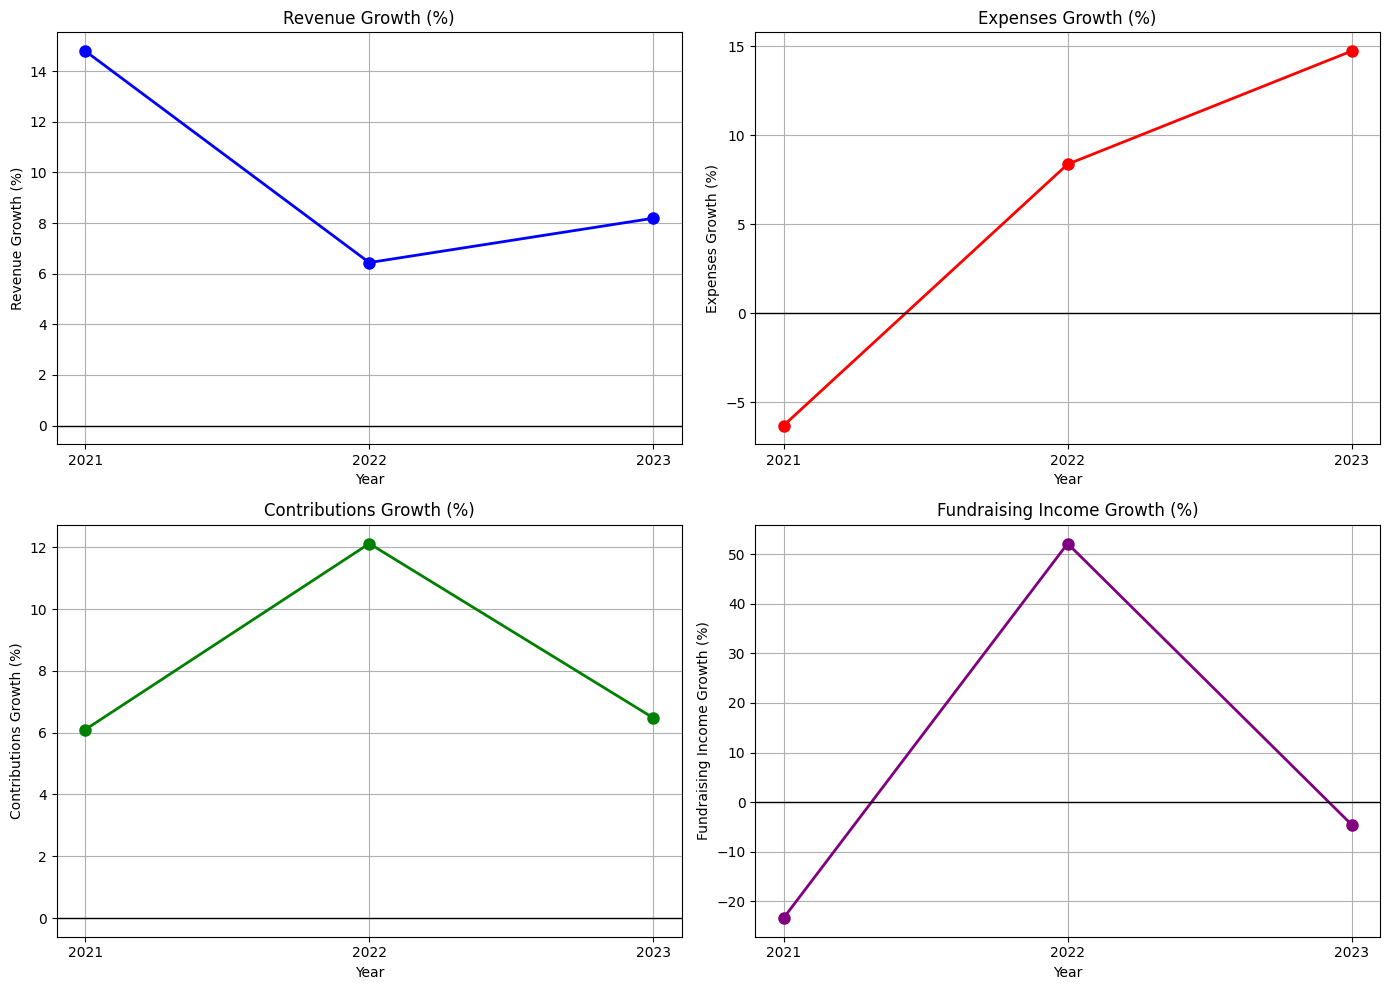

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Revenue Growth plot with reference line
axs[0, 0].plot(df990['Year'], df990['Revenue_Growth'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
axs[0, 0].set_title('Revenue Growth (%)')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Revenue Growth (%)')
axs[0, 0].grid(True)
axs[0, 0].axhline(0, color='black',linewidth=1)  # Add a horizontal line at 0 for reference

# Expenses Growth plot with reference line
axs[0, 1].plot(df990['Year'], df990['Expenses_Growth'], marker='o', color='red', linestyle='-', linewidth=2, markersize=8)
axs[0, 1].set_title('Expenses Growth (%)')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Expenses Growth (%)')
axs[0, 1].grid(True)
axs[0, 1].axhline(0, color='black',linewidth=1)  # Add a horizontal line at 0 for reference

# Contributions Growth plot with reference line
axs[1, 0].plot(df990['Year'], df990['Contributions_Growth'], marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
axs[1, 0].set_title('Contributions Growth (%)')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Contributions Growth (%)')
axs[1, 0].grid(True)
axs[1, 0].axhline(0, color='black',linewidth=1)  # Add a horizontal line at 0 for reference

# Fundraising Income Growth plot with reference line
axs[1, 1].plot(df990['Year'], df990['FundraisingIncome_Growth'], marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
axs[1, 1].set_title('Fundraising Income Growth (%)')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Fundraising Income Growth (%)')
axs[1, 1].grid(True)
axs[1, 1].axhline(0, color='black',linewidth=1)  # Add a horizontal line at 0 for reference

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


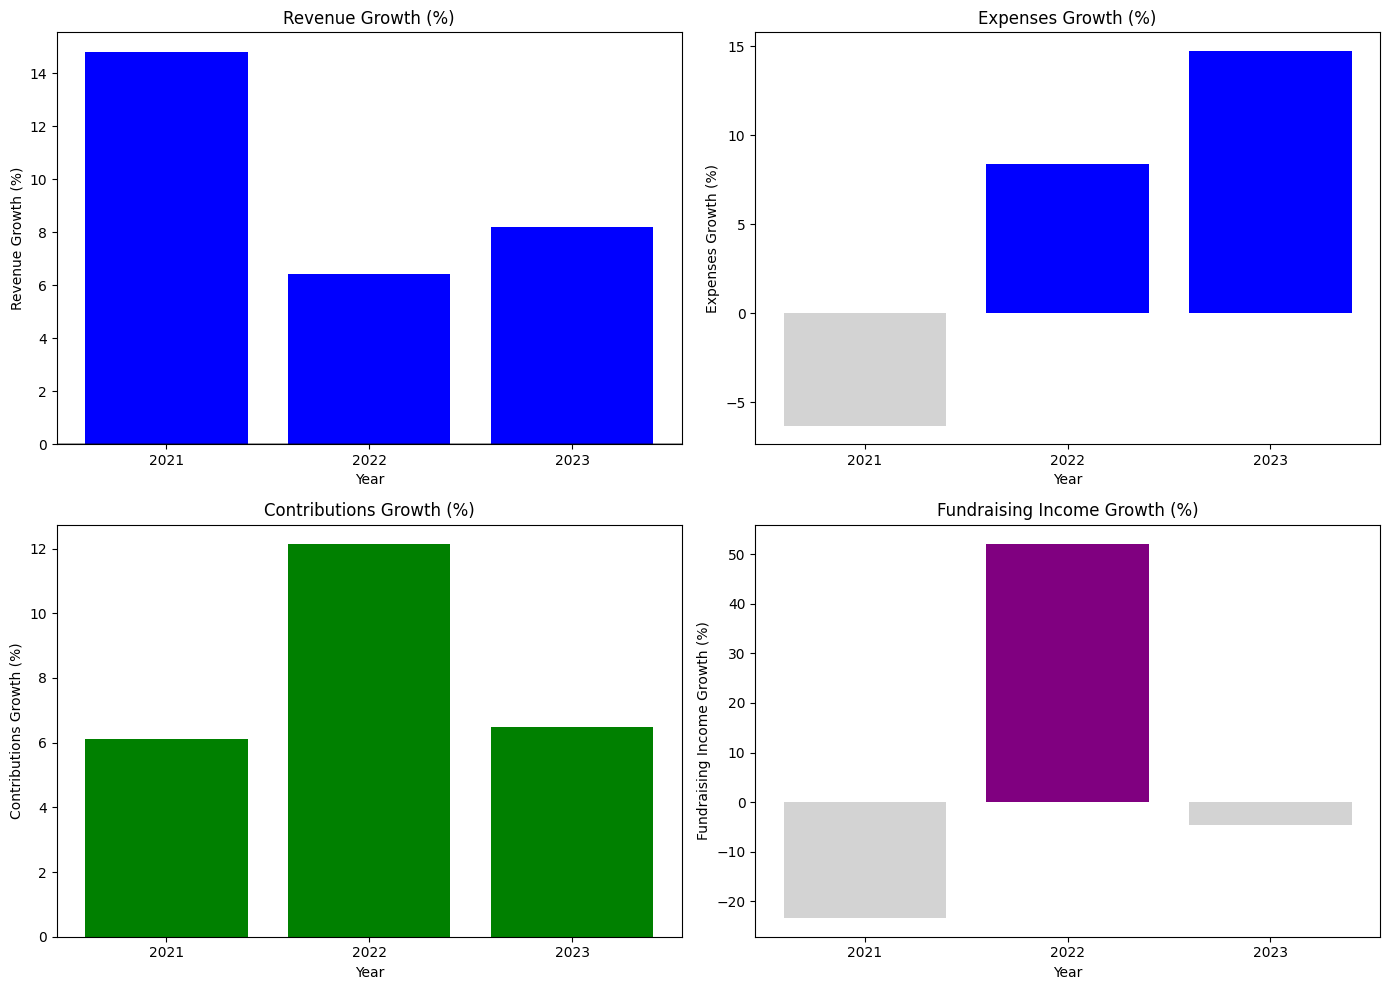

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Example for using a bar graph with shaded negative regions
axs[0, 0].bar(df990['Year'], df990['Revenue_Growth'], color=['lightgrey' if x < 0 else 'blue' for x in df990['Revenue_Growth']])
axs[0, 0].set_title('Revenue Growth (%)')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Revenue Growth (%)')

# # Bar chart for Revenue Growth
# axs[0, 0].bar(df990['Year'], df990['Revenue_Growth'], color='blue')
# axs[0, 0].set_title('Revenue Growth (%)')
# axs[0, 0].set_xlabel('Year')
# axs[0, 0].set_ylabel('Revenue Growth (%)')
# axs[0, 0].grid(True)
# axs[0, 0].axhline(0, color='black', linewidth=1)  # Add a horizontal line at 0 for reference

# Bar chart for Expenses Growth
axs[0, 1].bar(df990['Year'], df990['Expenses_Growth'], color=['lightgrey'
                                                              if x < 0 else 'blue' for x in df990['Expenses_Growth']])
axs[0, 1].set_title('Expenses Growth (%)')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Expenses Growth (%)')


# Bar chart for Contributions Growth
axs[1, 0].bar(df990['Year'], df990['Contributions_Growth'], color=['lightgrey'
                                                                   if x < 0 else 'green' for x in df990['Contributions_Growth']])
axs[1, 0].set_title('Contributions Growth (%)')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Contributions Growth (%)')
axs[0, 0].axhline(0, color='black', linewidth=1)  # Add a horizontal line at 0 for reference

# Bar chart for Fundraising Income Growth
axs[1, 1].bar(df990['Year'], df990['FundraisingIncome_Growth'], color=['lightgrey'
                                                                   if x < 0 else 'purple' for x in df990['FundraisingIncome_Growth']])
axs[1, 1].set_title('Fundraising Income Growth (%)')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Fundraising Income Growth (%)')
axs[0, 0].axhline(0, color='black', linewidth=1)  # Add a horizontal line at 0 for reference

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Notes:

Positive Growth (%) → Increase in revenue, contributions, or fundraising income.

Negative Growth (%) → Decrease, which may indicate financial instability.

High Variability in Fundraising Growth → Could indicate inconsistency in donor engagement.



1.  Revenue Growth:
This shows the change in revenue year-over-year.
A line chart or bar chart would effectively highlight the change in revenue growth over the years.
2. Expenses Growth:
A similar visualization to revenue growth, this shows how expenses have increased or decreased.
You could use a line chart or bar chart to compare growth visually.
3. Contributions Growth:
This shows how contributions have changed year-over-year.
A line chart can effectively demonstrate the growth trend.
4. Fundraising Income Growth:
This shows the growth of fundraising income over the years.
Again, a line chart or bar chart works well for showing trends over time.

# Appendix

Collaboration with OpenAI ChatGPT

##  Data Sources Ideas and Research

* Open Data for Nonprofit Research
https://nonprofit-open-data-collective.github.io/overview/

* Charity Navigator (charitynavigator.org)
  - Provides financials and trends on nonprofit donations.
  * AHA https://www.charitynavigator.org/ein/135613797
  * https://www.kaggle.com/datasets/katyjqian/charity-navigator-scores-expenses-dataset
  * Look at nonprofit financials, including fundraising revenue & expenses.

How to use it:
  * Search for reports on nonprofit fundraising trends.
  * Download relevant reports or scrape financial data.

* IRS 990 Filings (ProPublica)
  - Tax-exempt organizations' revenue and spending data.
      * Revenue & expenses (how much money they raise and spend).
      * Fundraising efficiency (cost to raise $1).
  - Detailed financial data for nonprofit organizations.
  - example created for research:
  * https://www.kaggle.com/datasets/katyali/irs-990-2020



* Kaggle Datasets (kaggle.com) – Search for nonprofit or fundraising datasets.
  - https://www.kaggle.com/datasets/michaelpawlus/fundraising-data?select=data_science_for_fundraising_donor_data.csv
    - and the book:  https://cooldata.wordpress.com/cooldatabook/

  * Charity Navigator Scores & Expenses Dataset from Kaggle (May 2019)
    * https://www.kaggle.com/datasets/katyjqiancharity-navigator-scores-expenses-dataset

  * Search for datasets with terms like:
      
    "Fundraising trends"

    "Nonprofit donations dataset"

    "Charity revenue and expenses"


## code snippets not used

In [ ]:
# # Set to store unique tag names
# unique_tags = set()

# # Loop through each file and collect tag names
# for file in xml_files:
#     tree = ET.parse(file)
#     root = tree.getroot()
#     for elem in root.iter():
#         unique_tags.add(elem.tag)

# # Print sorted unique tags
# print("\n🔍 Unique XML Tags Found:\n")
# for tag in sorted(unique_tags):
#     print(tag)

In [ ]:
# # Create subplots for different visualizations
# fig, ax = plt.subplots(figsize=(5, 10))

# # 1. Revenue vs. Expenses
# ax[0].bar(df990['Year'], df990['TotalRevenue'], label='Total Revenue', color='skyblue', alpha=0.7)
# ax[0].bar(df990['Year'], df990['TotalExpenses'], label='Total Expenses', color='lightcoral', alpha=0.7)
# ax[0].set_xlabel('Year')
# ax[0].set_ylabel('Amount in USD')
# ax[0].set_title('Revenue vs Expenses by Year')
# ax[0].legend()

# # # 2. Cost Per Dollar Raised
# norm = plt.Normalize(df990['CostPerDollarRaised'].min(), df990['CostPerDollarRaised'].max())
# colors = plt.cm.RdYlGn_r(norm(df990['CostPerDollarRaised']))

# bars = ax[1].bar(df990['Year'], df990['CostPerDollarRaised'], color=colors)
# ax[1].set_xlabel('Year')
# ax[1].set_ylabel('Cost Per Dollar Raised')
# ax[1].set_title('Cost Per Dollar Raised by Year')

# # Add value labels on bars for CostPerDollarRaised
# for bar in bars:
#     yval = bar.get_height()
#     ax[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# # 3. Fundraising Expenses Percent of Revenue
# ax[2].plot(df990['Year'], df990['FundraisingExpensesPercentTotalRevenue'], marker='o', color='blue')
# ax[2].set_xlabel('Year')
# ax[2].set_ylabel('Fundraising Expenses % of Revenue')
# ax[2].set_title('Fundraising Expenses as Percent of Revenue by Year')

# # Display the colorbar for the CostPerDollarRaised chart
# sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', norm=norm)
# sm.set_array([])  # To avoid a warning
# fig.colorbar(sm, ax=ax[1], label='Cost Per Dollar Raised')

# # Formatting
# plt.tight_layout()
# plt.show()
